In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")

In [2]:
data = pd.read_csv('crawl_data/Foody.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54124 entries, 0 to 54123
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comments  54124 non-null  object 
 1   ratings   54124 non-null  float64
dtypes: float64(1), object(1)
memory usage: 845.8+ KB


In [4]:
data[data.isna().any(axis=1)]

,comments,ratings


In [5]:
data[data.isnull().any(axis=1)]

,comments,ratings


In [6]:
print('Số review bị trùng lặp: ',data[data.duplicated()].shape[0])

Số review bị trùng lặp:  4665


In [7]:
# Loại bỏ review bị trùng lặp
data = data.drop_duplicates()
data.shape

(49459, 2)

In [8]:
data = data.reset_index()
data = data.drop(columns = ['index'])

In [11]:
data['comments'] = data.comments.str.lower()  #chuyển kí tự in hoa sang chữ thường

data['comments'] = data.comments.str.replace('\.',' ') #bỏ một số kí tự đặc biệt ngăn cách câu
data['comments'] = data.comments.str.replace(',',' ') #bỏ một số kí tự đặc biệt ngăn cách câu
data['comments'] = data.comments.str.replace('[0-9]+k|[0-9]+đ|[0-9]+vnd||[0-9]+vnđ','') #bỏ các cụm về giá 
data['comments'] = data.comments.str.replace( ':)','')
data['comments'] = data.comments.str.replace( '🥰',' yêu ')
data['comments'] = data.comments.str.replace( '😘',' yêu ')
data['comments'] = data.comments.str.replace( 'app','')
data['comments'] = data.comments.str.replace( ' add ',' thêm ')
data['comments'] = data.comments.str.replace( 'tuyệt vơi','tuyệt vời')
data['comments'] = data.comments.str.replace( 'tuyêth vời','tuyệt vời')
data['comments'] = data.comments.str.replace( 'soang chảnh','sang chảnh')
data['comments'] = data.comments.str.replace( 'chình ình','chình_ình')
data['comments'] = data.comments.str.replace( ' ình ',' mình ')
data['comments'] = data.comments.str.replace( ' tuyệ ',' tuyệt ')
data['comments'] = data.comments.str.replace(' kb ',' không biết ')
data['comments'] = data.comments.str.replace('chất kuwojng tuyệt vời','chất lượng tuyệt vời')
data['comments'] = data.comments.str.replace('báh','bánh')
data['comments'] = data.comments.str.replace(' xétăn ',' xét ăn ')
data['comments'] = data.comments.str.replace(' xétchứ ',' xét chứ ')
data['comments'] = data.comments.str.replace(' xétcũng ',' xét cũng ')
data['comments'] = data.comments.str.replace(' xétchung ',' xét chung ')
data['comments'] = data.comments.str.replace(' xétbên ',' xét bên ')
data['comments'] = data.comments.str.replace(' xétbánh ',' xét bánh ')
data['comments'] = data.comments.str.replace(' xétdở ',' xét dở ')
data['comments'] = data.comments.str.replace(' xétđã ',' xét đã ')
data['comments'] = data.comments.str.replace(' xétdiễn ',' xét diễn ')
data['comments'] = data.comments.str.replace(' xétđồ ',' xét đồ ')
data['comments'] = data.comments.str.replace(' xétlại ',' xét lại ')
data['comments'] = data.comments.str.replace(' xétnày ',' xét này ')
data['comments'] = data.comments.str.replace(' xétnèe ',' xét nè ')
data['comments'] = data.comments.str.replace(' xétkhá ',' xét khá ')
data['comments'] = data.comments.str.replace(' xétkhách ',' xét khách ')
data['comments'] = data.comments.str.replace(' xétở ',' xét ở ')
data['comments'] = data.comments.str.replace(' xétlà ',' xét là ')
data['comments'] = data.comments.str.replace(' xétmọi ',' xét mọi ')
data['comments'] = data.comments.str.replace(' xéttrên ',' xét trên ')
data['comments'] = data.comments.str.replace(' xétnên ',' xét nên ')
data['comments'] = data.comments.str.replace(' xétnói ',' xét nói ')
data['comments'] = data.comments.str.replace(' xétquán ',' xét quán ')
data['comments'] = data.comments.str.replace(' xéttừng ',' xét từng ')
data['comments'] = data.comments.str.replace(' xétrồi ',' xét rồi ')
data['comments'] = data.comments.str.replace(' xétthấy ',' xét thấy ')
data['comments'] = data.comments.str.replace(' xétkỉu ',' xét kiểu ')
data['comments'] = data.comments.str.replace(' xétkhông ',' xét không ')
data['comments'] = data.comments.str.replace(' xétvề ',' xét về ')
data['comments'] = data.comments.str.replace('xéthuhu','xét huhu')
data['comments'] = data.comments.str.replace('xemiễn','xe miễn')
data['comments'] = data.comments.str.replace(' k hề ',' không hề ')
data['comments'] = data.comments.str.replace('đưpj','đẹp')
data['comments'] = data.comments.str.replace('rẻe','rẻ')
data['comments'] = data.comments.str.replace(' ưg ',' ưng ')
data['comments'] = data.comments.str.replace(' bôg ',' bông ')
data['comments'] = data.comments.str.replace(' uốg ',' uống ')
data['comments'] = data.comments.str.replace(' mìh ',' mình ')
data['comments'] = data.comments.str.replace(' rat ',' rất ')
data['comments'] = data.comments.str.replace('râdt','rất')
data['comments'] = data.comments.str.replace('báa','bá')
data['comments'] = data.comments.str.replace('dmọi','đó mọi')
data['comments'] = data.comments.str.replace('rata','rất')
data['comments'] = data.comments.str.replace('dimớium','mới')
data['comments'] = data.comments.str.replace(' nhuet65 ',' nhiệt ')
data['comments'] = data.comments.str.replace(' mỳ ',' mì ')
data['comments'] = data.comments.str.replace(' cmt ',' bình luận ')
data['comments'] = data.comments.str.replace(' rv ',' nhận xét ')
data['comments'] = data.comments.str.replace(' t ',' tao ')
data['comments'] = data.comments.str.replace(' chea ',' chưa ')
data['comments'] = data.comments.str.replace(' ngonn ',' ngon ')
data['comments'] = data.comments.str.replace(' qay ',' quay ')
data['comments'] = data.comments.str.replace(' faỉ ',' phải ')
data['comments'] = data.comments.str.replace(' it ',' ít ')
data['comments'] = data.comments.str.replace(' thàh ',' thành ')
data['comments'] = data.comments.str.replace(' nnhaf ',' nhà ')
data['comments'] = data.comments.str.replace(' nhiêud ',' nhiều ')
data['comments'] = data.comments.str.replace('vọmg','vọng')
data['comments'] = data.comments.str.replace(' nc ',' nước ')
data['comments'] = data.comments.str.replace(' nuoc ',' nước ')
data['comments'] = data.comments.str.replace(' nươc ',' nước ')
data['comments'] = data.comments.str.replace(' ma91m ',' mắm ')
data['comments'] = data.comments.str.replace(' muon1 ',' muốn ')
data['comments'] = data.comments.str.replace(' muóin ',' muốn ')
data['comments'] = data.comments.str.replace('deliverynow','')
data['comments'] = data.comments.str.replace(' foody ',' ')
data['comments'] = data.comments.str.replace(' grab ',' ')  
data['comments'] = data.comments.str.replace(' baemin ',' ')    
data['comments'] = data.comments.str.replace(' gojek ',' ')
data['comments'] = data.comments.str.replace(' sale ',' ')
data['comments'] = data.comments.str.replace(' fresh ',' sạch ')
data['comments'] = data.comments.str.replace('tđộ','thái độ')
data['comments'] = data.comments.str.replace('thái đô','thái độ')
data['comments'] = data.comments.str.replace(' ún ',' uống ')
data['comments'] = data.comments.str.replace(' ăm ',' ăn ')
data['comments'] = data.comments.str.replace(' roàii ',' rồi ')
data['comments'] = data.comments.str.replace(' đôg ',' đông ')
data['comments'] = data.comments.str.replace(' cũg ',' cũng ')
data['comments'] = data.comments.str.replace(' tơi ',' hơi ')
data['comments'] = data.comments.str.replace(' mụt ',' một ')
data['comments'] = data.comments.str.replace(' ok.',' được.')
data['comments'] = data.comments.str.replace(' chut ',' chút ')
data['comments'] = data.comments.str.replace('thíc hợp','thích hợp')
data['comments'] = data.comments.str.replace('dêc thương','dễ thương')
data['comments'] = data.comments.str.replace(' ai nă ',' ai ăn ')
data['comments'] = data.comments.str.replace(' an vào lai ',' ăn vào lại ')
data['comments'] = data.comments.str.replace(' an ngon ',' ăn ngon ')
data['comments'] = data.comments.str.replace(' mọi nguoi ',' mọi người ')
data['comments'] = data.comments.str.replace(' mieng thit ',' miếng thịt ')
data['comments'] = data.comments.str.replace(' tranht hủ ',' tranh thủ ')
data['comments'] = data.comments.str.replace(' mã km ',' mã khuyến mãi ')
data['comments'] = data.comments.str.replace(' ơi kì ',' hơi kì ')
data['comments'] = data.comments.str.replace(' nhà hàg ',' nhà hàng ')
data['comments'] = data.comments.str.replace(' hợp lú ',' hợp lý ')
data['comments'] = data.comments.str.replace(' lầm li ',' lầm lì ')
data['comments'] = data.comments.str.replace(' fai bàn ',' phải bàn ')
data['comments'] = data.comments.str.replace(' decor ',' trang trí ')
data['comments'] = data.comments.str.replace(' decoration ',' trang trí ')
data['comments'] = data.comments.str.replace(' lân chào ',' lần nào ')
data['comments'] = data.comments.str.replace('thân thiệ','thân thiện')
data['comments'] = data.comments.str.replace('bôi***quá','bôi bác quá')
data['comments'] = data.comments.str.replace('delivery','')
data['comments'] = data.comments.str.replace('amateur','nghiệp dư')
data['comments'] = data.comments.str.replace('must try','phải thử')
data['comments'] = data.comments.str.replace('must-try','phải thử')
data['comments'] = data.comments.str.replace('gònnếu',' gòn nếu')
data['comments'] = data.comments.str.replace('tíh $','tính tiền')
data['comments'] = data.comments.str.replace('1 đi','một đi')
data['comments'] = data.comments.str.replace(' món an ',' món ăn ')
data['comments'] = data.comments.str.replace(' quá tặng ',' quán tặng ')
data['comments'] = data.comments.str.replace('the mup’s cake','')
data['comments'] = data.comments.str.replace('hợp lí','hợp lý')
data['comments'] = data.comments.str.replace('phục vụ tê','phục vụ tệ')
data['comments'] = data.comments.str.replace('k nhớ','không nhớ')
data['comments'] = data.comments.str.replace('ko gian','không gian')
data['comments'] = data.comments.str.replace('không gián','không gian')
data['comments'] = data.comments.str.replace('chất lương','chất lượng')
data['comments'] = data.comments.str.replace(' cuốitụi ',' cuối tụi ')
data['comments'] = data.comments.str.replace(' soeeu ngon ',' siêu ngon ')
data['comments'] = data.comments.str.replace('tôn tiền','tốn tiền')
data['comments'] = data.comments.str.replace('bé chỗ này','né chỗ này')
data['comments'] = data.comments.str.replace('giá phải chăng','giá hợp lý')
data['comments'] = data.comments.str.replace('giá cả phải chăng','giá cả hợp lý')
data['comments'] = data.comments.str.replace('ngọn đẹp mắt','ngon đẹp mắt')
data['comments'] = data.comments.str.replace('ko bao h','không bao giờ')
data['comments'] = data.comments.str.replace(' kbây giờ ',' không bao giờ ')
data['comments'] = data.comments.str.replace('nc đang hoang','nói chuyện đàng hoàng')
data['comments'] = data.comments.str.replace('mạt thi kênh kênh','mặt thì kênh kênh')
data['comments'] = data.comments.str.replace('va an rat vua mieng','và ăn rất vừa miệng')
data['comments'] = data.comments.str.replace('#khôngbaogioquaylai','không bao giờ quay lại')
data['comments'] = data.comments.str.replace('khongbaogioquaylai','không bao giờ quay lại')
data['comments'] = data.comments.str.replace('các loại món  từ đồ mặt','các loại món từ đồ mặn')
data['comments'] = data.comments.str.replace('sot di kem thi vi ngot nước thit','sốt đi kèm thì vị ngọt nước thịt')
data['comments'] = data.comments.str.replace('chu yeu la duong va nước bot se se','chủ yếu là đường và nước bột se se')
data['comments'] = data.comments.str.replace('ăn nhieu nơi chua thay ai tiết kiệm nhu vậy .','ăn nhiều nơi chưa thấy ai tiết kiệm như vậy.')
data['comments'] = data.comments.str.replace('minh phai dem len chao chien so va nem nem lai.','mình phải đem lên chảo chiên sơ và nêm nếm lại')
data['comments'] = data.comments.str.replace('minh hay an ga truyen ky chi nhanh quan 5 rất ngon thay moi nguoi khen ben đay nhieu nen dặt ở đay an thử.that vọng tràn trề.gà rất tanh không ngọt thịt .va rất lạ mình an xong đánh giá thì không thấy bình luận của mình bên now','minh hay ăn gà truyền kỳ chi nhánh quận 5 rất ngon thấy mọi người khen ben đây nhiều nên đặt ở đây ăn thử.thất vọng tràn trề.gà rất tanh không ngọt thịt .và rất lạ mình ăn xong đánh giá thì không thấy bình luận của mình bên now')


data['comments'] = data.comments.str.replace(r'(\w)\1*',r'\1') #thay thế những từ lặp đi lặp lại như wowwwww => wow
data['comments'] = data.comments.str.replace(r'\b[kk]+\b',' tốt ') # ít nhất 2 chữ kk liên tục đổi thành tốt
data['comments'] = data.comments.str.replace('[^a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]',' ')
data['comments'] = data.comments.str.replace(' [a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]{1} ',' ')
khong = [' khg ', ' k ',' ko ', ' k0 ', ' kog ', ' đéo ', ' đếch ', ' nỏ ', ' not ', ' kg ', ' khôg ' , ' hok ', ' hông ', ' kô ', ' chẳng ', ' chẳg ', ' khỏi ', ' kh ', ' hong ', ' doesn t ', ' don t ', ' khong ']
for c in khong:
    data['comments'] = data.comments.str.replace(c,' không ')

tot = [' gút ', ' good ', ' gud ', ' nice ', ' nicely ', ' perfect ', ' perfectly ']
for c in tot:
    data['comments'] = data.comments.str.replace(c,' tốt ')

dc = [' đc ', ' dc ', ' dk ', ' đk ', ' dx ', ' đx ',  ' duoc ',' okie ', ' okey ', ' ô kê ', ' oke ', ' okay ', 'ok', ' oki ']
for c in dc:
    data['comments'] = data.comments.str.replace(c,' được ')

thich = ['like', ' thik ', ' thix ', ' thjk ', ' thich ']
for c in thich:
    data['comments'] = data.comments.str.replace(c,' thích ')

bthg = [' bt ', ' bth ', ' bthg ']
for c in bthg:
    data['comments'] = data.comments.str.replace(c,' bình thường ')

ngon = [' mlem ', ' yummy ', ' nhon ', ' ngol ', ' delicious ', ' tasty ', ' wao ', ' wào ', ' wow ']
for c in ngon:
    data['comments'] = data.comments.str.replace(c,' ngon ')

order = [' book ', 'order', ' ord ', ' od ' , ' oder ']
for c in order:
    data['comments'] = data.comments.str.replace(c,' đặt ')

roi = [' r ', ' roi ', ' roài ', ' ròi ']
for c in roi:
    data['comments'] = data.comments.str.replace(c,' rồi ')

thanks = [' tks ', ' thanks ', ' thank ', ' tanks ', ' tk ']
for c in thanks:
    data['comments'] = data.comments.str.replace(c,' cảm ơn ')

biet = [' bik ', ' bík ', ' pjk ', ' pik ']
for c in biet:
    data['comments'] = data.comments.str.replace(c,' biết ')

minh = [' m ', ' mik ']
for  c in minh:
    data['comments'] = data.comments.str.replace(c,' mình ')

qua = [' qá ', ' wá ']
for  c in qua:
    data['comments'] = data.comments.str.replace(c,' quá ')

cuoi = [' ha ha ', ' haha ', ' he he ', ' hehe ', ' hi hi ', ' hihi ', ' hj hj ', ' hjhj ', ' hêh ', ' cười ', ' cheers ', ' hihi ']
for  c in cuoi:
    data['comments'] = data.comments.str.replace(c,' cười ')

te = [' shit ', ' cc ', ' sad ', ' poor ', ' worst ', ' disapointed ', ' tasteless ', ' disgusted ', ' bad ', ' fucking ']
for  c in te:
    data['comments'] = data.comments.str.replace(c,' tệ ')

dat = [' expensive ', ' mắc ', ' overpriced ', ' overpirced ']
for  c in dat:
    data['comments'] = data.comments.str.replace(c,' đắt ')

nv = [' nv ', ' nvien ', ' n.viên ']
for c in nv:
    data['comments'] = data.comments.str.replace(c,' nhân viên ')

cheap = [' cheap ', ' gẻ ', ' ghẻ ']
for c in cheap:
    data['comments'] = data.comments.str.replace(c,' rẻ ')

xs = [' fantastic ', ' excelent ', ' xúc xắc ', ' xuất sắccc ']
for c in xs:
    data['comments'] = data.comments.str.replace(c,' xuất_sắc ')

rude = [' impolite ', ' rude ', ' láo ', ' mất dạy ', ' hỗn xược ', ' thô lỗ ']
for c in rude:
    data['comments'] = data.comments.str.replace(c,' bất lịch sự ')

pv = [' pv ', ' pvu ']
for c in pv:
    data['comments'] = data.comments.str.replace(c,' phục vụ ')

cmt = [' cmmt ', ' cmt ', ' comment ']
for c in cmt:
    data['comments'] = data.comments.str.replace(c,' bình luận ')

truoc_day = [' trước kia ', ' trước đó ']
for c in truoc_day:
    data['comments'] = data.comments.str.replace(c,' trước đây ')
    


### --- Đổi 15k, 75k,... thành 15000, 75000,....
# Hàm thay thế để chuyển "k" thành "000" và chuyển chuỗi thành số nguyên
def replace_with_thousands(match):
    return str(int(match.group(1)) * 1000)

# Thay thế "k" bằng "000" và chuyển chuỗi thành số nguyên
data['comments'] = data['comments'].apply(lambda x: re.sub(r'(\d+)k', replace_with_thousands, x))



# Biểu thức chính quy để bỏ các chữ cái kéo dài
# Hàm thay thế để giữ lại chữ cái đầu tiên và loại bỏ các chữ cái kéo dài
def remove_repeated_letters(match):
    return match.group(1)

# Thay thế các chữ cái kéo dài bằng các chữ cái duy nhất
data['comments'] = data['comments'].apply(lambda x: re.sub(r'(\w)(\1{2,})', remove_repeated_letters, x))


replace_list = {' ship ': ' giao hàng ', ' fody ': ' ứng dụng ',' tl ':' trả lời ',' r ':' rồi ','vs':'với','trể':'trễ','bh':'bây giờ',' ntn ':' như thế này ',
                 'ms':'mới', ' hnay ':' hôm nay ', 'mn':'mọi người', 'dậy':'vậy',' dzay ':' vậy ',' wa ':' qua ', ' zui ':' vui ',' kbh ':' không bao giờ ',
                 'nx':'nhận xét', ' dj ':' đi ', ' rùi ':' rồi ',' view ':' phong cảnh ','cx':'cũng',' kbiet ':' không biết ', ' review ':' nhận xét',
                ' trc ':' trước ', ' bil ': ' hóa đơn', ' shiper ' : ' người vận chuyển ', 'shipper': 'người vận chuyển'  ,'check in': '', 'checkin':'',
               'chick in':'', ' c ': ' chị ', ' t ': ' tôi ', ' a ':' anh ', ' j ': ' gì ', ' mún ': ' muốn ', ' ngag ': ' ngang ', ' ak ': ' à ',
               ' complain ': ' phàn nàn ', ' free ': ' miễn phí ', ' free.': ' miễn phí.', ' phờ ri ': ' miễn phí ' ,' recommend ': ' đề xuất ', 
                ' cùg ': ' cùng ', ' nhưg ': ' nhưng ', 'qua loa': 'sơ sài', 'xơ sài': 'sơ sài','sơ xài': 'sơ sài', ' never ': ' không bao giờ ',
                ' service ': ' phục vụ ', 'vui vẽ': 'vui vẻ', ' <3 ': ' yêu ', 'nghĩ dưỡng': 'nghỉ dưỡng', 'trung bìng': 'trung bình', 
                'bỗ duong': 'bổ dưỡng', 'đất mất': 'đẹp mắt', 'nice': 'tốt', ' soeeu đỉnh ': ' siêu đỉnh ', 'thân thiệnn': 'thân thiện',
                'quay lại': 'trở lại', 'ghé lại': 'trở lại', 'thắc đắt': 'thắc mắc', ' củg ': ' củng ', ' take care ' : ' chăm sóc ',
                'rất là': 'rất', 'quá là': 'quá', ' ròn ' : ' giòn ', 'welcome': 'chào đón', 'tiet kiem': 'tiết kiệm', ' siêu ': ' rất ',
                ' cốc ': ' ly ', 'tí hon': 'nhỏ', ' kute ': ' dễ thương ', ' cute ': ' dễ thương ', ' best ': ' tuyệt vời ', 'very bad' : 'rất tệ',
                'come back': 'trở lại', 'sang chảnh': 'sang trọng', 'luxury': 'sang trọng', 'cũng được': 'khá ngon', 'không quá': 'bình thường',
                'thạm tệ': 'thậm tệ', 'công túa': 'công chúa', 'không bị': 'không', 'không được': 'không', 'service': 'phục vụ', 'xức xắc': 'xuất sắc',
                'super': 'rất', 'không thấy chán': 'không chán', 'không thấy ngon': 'không ngon', 'không thấy no': 'không no', 'không thấy ngán': 'không ngán',
                }

for word, rep_word in replace_list.items():
  data['comments'] = data.comments.str.replace(word,rep_word)


data['comments'] = data.comments.str.replace(r'(\s)\1*',r'\1') #thay thế những khoảng trắng lặp lại

In [10]:
def replace_word(text):
    text = text.lower()  #chuyển kí tự in hoa sang chữ thường
    
    text = text.replace('\.',' ') #bỏ một số kí tự đặc biệt ngăn cách câu
    text = text.replace(',',' ') #bỏ một số kí tự đặc biệt ngăn cách câu
    text = text.replace('[0-9]+k|[0-9]+đ|[0-9]+vnd||[0-9]+vnđ','') #bỏ các cụm về giá 
    text = text.replace( ':)','')
    text = text.replace( '🥰',' yêu ')
    text = text.replace( '😘',' yêu ')
    text = text.replace( 'app','')
    text = text.replace( ' add ',' thêm ')
    text = text.replace( 'tuyệt vơi','tuyệt vời')
    text = text.replace( 'tuyêth vời','tuyệt vời')
    text = text.replace( 'soang chảnh','sang chảnh')
    text = text.replace( 'chình ình','chình_ình')
    text = text.replace( ' ình ',' mình ')
    text = text.replace( ' tuyệ ',' tuyệt ')
    text = text.replace(' kb ',' không biết ')
    text = text.replace('báh','bánh')
    text = text.replace(' k hề ',' không hề ')
    text = text.replace('đưpj','đẹp')
    text = text.replace('rẻe','rẻ')
    text = text.replace(' ưg ',' ưng ')
    text = text.replace(' bôg ',' bông ')
    text = text.replace(' uốg ',' uống ')
    text = text.replace(' mìh ',' mình ')
    text = text.replace(' rat ',' rất ')
    text = text.replace('râdt','rất')
    text = text.replace('báa','bá')
    text = text.replace('dmọi','đó mọi')
    text = text.replace('rata','rất')
    text = text.replace(' mỳ ',' mì ')
    text = text.replace(' cmt ',' bình luận ')
    text = text.replace(' rv ',' nhận xét ')
    text = text.replace(' t ',' tao ')
    text = text.replace(' chea ',' chưa ')
    text = text.replace(' ngonn ',' ngon ')
    text = text.replace(' qay ',' quay ')
    text = text.replace(' faỉ ',' phải ')
    text = text.replace(' it ',' ít ')
    text = text.replace(' thàh ',' thành ')
    text = text.replace(' nnhaf ',' nhà ')
    text = text.replace(' nhiêud ',' nhiều ')
    text = text.replace('vọmg','vọng')
    text = text.replace(' nc ',' nước ')
    text = text.replace(' nuoc ',' nước ')
    text = text.replace(' nươc ',' nước ')
    text = text.replace(' ma91m ',' mắm ')
    text = text.replace(' muon1 ',' muốn ')
    text = text.replace(' muóin ',' muốn ')
    text = text.replace('deliverynow','')
    text = text.replace(' foody ',' ')
    text = text.replace(' grab ',' ')  
    text = text.replace(' baemin ',' ')    
    text = text.replace(' gojek ',' ')
    text = text.replace(' sale ',' ')
    text = text.replace(' fresh ',' sạch ')
    text = text.replace('tđộ','thái độ')
    text = text.replace('thái đô','thái độ')
    text = text.replace(' ún ',' uống ')
    text = text.replace(' ăm ',' ăn ')
    text = text.replace(' roàii ',' rồi ')
    text = text.replace(' đôg ',' đông ')
    text = text.replace(' cũg ',' cũng ')
    text = text.replace(' tơi ',' hơi ')
    text = text.replace(' mụt ',' một ')
    text = text.replace(' ok.',' được.')
    text = text.replace(' chut ',' chút ')
    text = text.replace('thíc hợp','thích hợp')
    text = text.replace('dêc thương','dễ thương')
    text = text.replace(' ai nă ',' ai ăn ')
    text = text.replace(' an vào lai ',' ăn vào lại ')
    text = text.replace(' an ngon ',' ăn ngon ')
    text = text.replace(' mọi nguoi ',' mọi người ')
    text = text.replace(' mieng thit ',' miếng thịt ')
    text = text.replace(' tranht hủ ',' tranh thủ ')
    text = text.replace(' mã km ',' mã khuyến mãi ')
    text = text.replace(' ơi kì ',' hơi kì ')
    text = text.replace(' nhà hàg ',' nhà hàng ')
    text = text.replace(' hợp lú ',' hợp lý ')
    text = text.replace(' lầm li ',' lầm lì ')
    text = text.replace(' fai bàn ',' phải bàn ')
    text = text.replace(' decor ',' trang trí ')
    text = text.replace(' decoration ',' trang trí ')
    text = text.replace(' lân chào ',' lần nào ')
    text = text.replace('thân thiệ','thân thiện')
    text = text.replace('delivery','')
    text = text.replace('amateur','nghiệp dư')
    text = text.replace('must try','phải thử')
    text = text.replace('must-try','phải thử')
    text = text.replace('gònnếu',' gòn nếu')
    text = text.replace('tíh $','tính tiền')
    text = text.replace('1 đi','một đi')
    text = text.replace(' món an ',' món ăn ')
    text = text.replace(' quá tặng ',' quán tặng ')
    text = text.replace('hợp lí','hợp lý')
    text = text.replace('phục vụ tê','phục vụ tệ')
    text = text.replace('k nhớ','không nhớ')
    text = text.replace('ko gian','không gian')
    text = text.replace('không gián','không gian')
    text = text.replace('chất lương','chất lượng')
    text = text.replace(' cuốitụi ',' cuối tụi ')
    text = text.replace(' soeeu ngon ',' siêu ngon ')
    text = text.replace('tôn tiền','tốn tiền')
    text = text.replace('bé chỗ này','né chỗ này')
    text = text.replace('giá phải chăng','giá hợp lý')
    text = text.replace('giá cả phải chăng','giá cả hợp lý')
    text = text.replace('ngọn đẹp mắt','ngon đẹp mắt')
    text = text.replace('ko bao h','không bao giờ')
    text = text.replace(' kbây giờ ',' không bao giờ ')
    text = text.replace('#khôngbaogioquaylai','không bao giờ quay lại')
    text = text.replace('khongbaogioquaylai','không bao giờ quay lại')

    
    text = text.replace(r'(\w)\1*',r'\1') #thay thế những từ lặp đi lặp lại như wowwwww => wow
    text = text.replace(r'\b[kk]+\b',' tốt ') # ít nhất 2 chữ kk liên tục đổi thành tốt
    text = text.replace('[^a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]',' ')
    text = text.replace(' [a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]{1} ',' ')
    khong = [' khg ', ' k ',' ko ', ' k0 ', ' kog ', ' đéo ', ' đếch ', ' nỏ ', ' not ', ' kg ', ' khôg ' , ' hok ', ' hông ', ' kô ', ' chẳng ', ' chẳg ', ' khỏi ', ' kh ', ' hong ', ' doesn t ', ' don t ', ' khong ']
    for c in khong:
        text = text.replace(c,' không ')
    
    tot = [' gút ', ' good ', ' gud ', ' nice ', ' nicely ', ' perfect ', ' perfectly ']
    for c in tot:
        text = text.replace(c,' tốt ')
    
    dc = [' đc ', ' dc ', ' dk ', ' đk ', ' dx ', ' đx ',  ' duoc ',' okie ', ' okey ', ' ô kê ', ' oke ', ' okay ', 'ok', ' oki ']
    for c in dc:
        text = text.replace(c,' được ')
    
    thich = ['like', ' thik ', ' thix ', ' thjk ', ' thich ']
    for c in thich:
        text = text.replace(c,' thích ')
    
    bthg = [' bt ', ' bth ', ' bthg ']
    for c in bthg:
        text = text.replace(c,' bình thường ')
    
    ngon = [' mlem ', ' yummy ', ' nhon ', ' ngol ', ' delicious ', ' tasty ', ' wao ', ' wào ', ' wow ']
    for c in ngon:
        text = text.replace(c,' ngon ')
    
    order = [' book ', 'order', ' ord ', ' od ' , ' oder ']
    for c in order:
        text = text.replace(c,' đặt ')
    
    roi = [' r ', ' roi ', ' roài ', ' ròi ']
    for c in roi:
        text = text.replace(c,' rồi ')
    
    thanks = [' tks ', ' thanks ', ' thank ', ' tanks ', ' tk ']
    for c in thanks:
        text = text.replace(c,' cảm ơn ')
    
    biet = [' bik ', ' bík ', ' pjk ', ' pik ']
    for c in biet:
        text = text.replace(c,' biết ')
    
    minh = [' m ', ' mik ']
    for  c in minh:
        text = text.replace(c,' mình ')
    
    qua = [' qá ', ' wá ']
    for  c in qua:
        text = text.replace(c,' quá ')
    
    cuoi = [' ha ha ', ' haha ', ' he he ', ' hehe ', ' hi hi ', ' hihi ', ' hj hj ', ' hjhj ', ' hêh ', ' cười ', ' cheers ', ' hihi ']
    for  c in cuoi:
        text = text.replace(c,' cười ')
    
    te = [' shit ', ' cc ', ' sad ', ' poor ', ' worst ', ' disapointed ', ' tasteless ', ' disgusted ', ' bad ', ' fucking ']
    for  c in te:
        text = text.replace(c,' tệ ')
    
    dat = [' expensive ', ' mắc ', ' overpriced ', ' overpirced ']
    for  c in dat:
        text = text.replace(c,' đắt ')
    
    nv = [' nv ', ' nvien ', ' n.viên ']
    for c in nv:
        text = text.replace(c,' nhân viên ')
    
    cheap = [' cheap ', ' gẻ ', ' ghẻ ']
    for c in cheap:
        text = text.replace(c,' rẻ ')
    
    xs = [' fantastic ', ' excelent ', ' xúc xắc ', ' xuất sắccc ']
    for c in xs:
        text = text.replace(c,' xuất_sắc ')
    
    rude = [' impolite ', ' rude ', ' láo ', ' mất dạy ', ' hỗn xược ', ' thô lỗ ']
    for c in rude:
        text = text.replace(c,' bất lịch sự ')
    
    pv = [' pv ', ' pvu ']
    for c in pv:
        text = text.replace(c,' phục vụ ')
    
    cmt = [' cmmt ', ' cmt ', ' comment ']
    for c in cmt:
        text = text.replace(c,' bình luận ')
    
    truoc_day = [' trước kia ', ' trước đó ']
    for c in truoc_day:
        text = text.replace(c,' trước đây ')
        
    
    
    ### --- Đổi 15k, 75k,... thành 15000, 75000,....
    # Hàm thay thế để chuyển "k" thành "000" và chuyển chuỗi thành số nguyên
    def replace_with_thousands(match):
        return str(int(match.group(1)) * 1000)
    
    # Thay thế "k" bằng "000" và chuyển chuỗi thành số nguyên
    text = re.sub(r'(\d+)k', replace_with_thousands, text)
    
    
    
    # Biểu thức chính quy để bỏ các chữ cái kéo dài
    # Hàm thay thế để giữ lại chữ cái đầu tiên và loại bỏ các chữ cái kéo dài
    def remove_repeated_letters(match):
        return match.group(1)
    
    # Thay thế các chữ cái kéo dài bằng các chữ cái duy nhất
    text = re.sub(r'(\w)(\1{2,})', remove_repeated_letters, text)
    
    
    replace_list = {' ship ': ' giao hàng ', ' fody ': ' ứng dụng ',' tl ':' trả lời ',' r ':' rồi ','vs':'với','trể':'trễ','bh':'bây giờ',' ntn ':' như thế này ',
                     'ms':'mới', ' hnay ':' hôm nay ', 'mn':'mọi người', 'dậy':'vậy',' dzay ':' vậy ',' wa ':' qua ', ' zui ':' vui ',' kbh ':' không bao giờ ',
                     'nx':'nhận xét', ' dj ':' đi ', ' rùi ':' rồi ',' view ':' phong cảnh ','cx':'cũng',' kbiet ':' không biết ', ' review ':' nhận xét',
                    ' trc ':' trước ', ' bil ': ' hóa đơn', ' shiper ' : ' người vận chuyển ', 'shipper': 'người vận chuyển'  ,'check in': '', 'checkin':'',
                   'chick in':'', ' c ': ' chị ', ' t ': ' tôi ', ' a ':' anh ', ' j ': ' gì ', ' mún ': ' muốn ', ' ngag ': ' ngang ', ' ak ': ' à ',
                   ' complain ': ' phàn nàn ', ' free ': ' miễn phí ', ' free.': ' miễn phí.', ' phờ ri ': ' miễn phí ' ,' recommend ': ' đề xuất ', 
                    ' cùg ': ' cùng ', ' nhưg ': ' nhưng ', 'qua loa': 'sơ sài', 'xơ sài': 'sơ sài','sơ xài': 'sơ sài', ' never ': ' không bao giờ ',
                    ' service ': ' phục vụ ', 'vui vẽ': 'vui vẻ', ' <3 ': ' yêu ', 'nghĩ dưỡng': 'nghỉ dưỡng', 'trung bìng': 'trung bình', 
                    'bỗ duong': 'bổ dưỡng', 'đất mất': 'đẹp mắt', 'nice': 'tốt', ' soeeu đỉnh ': ' siêu đỉnh ', 'thân thiệnn': 'thân thiện',
                    'quay lại': 'trở lại', 'ghé lại': 'trở lại', 'thắc đắt': 'thắc mắc', ' củg ': ' củng ', ' take care ' : ' chăm sóc ',
                    'rất là': 'rất', 'quá là': 'quá', ' ròn ' : ' giòn ', 'welcome': 'chào đón', 'tiet kiem': 'tiết kiệm', ' siêu ': ' rất ',
                    ' cốc ': ' ly ', 'tí hon': 'nhỏ', ' kute ': ' dễ thương ', ' cute ': ' dễ thương ', ' best ': ' tuyệt vời ', 'very bad' : 'rất tệ',
                    'come back': 'trở lại', 'sang chảnh': 'sang trọng', 'luxury': 'sang trọng', 'cũng được': 'khá ngon', 'không quá': 'bình thường',
                    'thạm tệ': 'thậm tệ', 'công túa': 'công chúa', 'không bị': 'không', 'không được': 'không', 'service': 'phục vụ', 'xức xắc': 'xuất sắc',
                    'super': 'rất', 'không thấy chán': 'không chán', 'không thấy ngon': 'không ngon', 'không thấy no': 'không no', 'không thấy ngán': 'không ngán',
                    }
    
    for word, rep_word in replace_list.items():
      text = text.replace(word,rep_word)
    
    
    text = text.replace(r'(\s)\1*',r'\1') #thay thế những khoảng trắng lặp lại
    return text

In [12]:
#add columns review_class:
data['review_class'] = ['positive' if a >= 8 else 'negative' if a < 5 else 'neural' for a in data.ratings]
#label encoder:
data['review_class_num'] = [0 if x == 'positive'  else 1 if x == 'neural' else 2 for x in data.review_class]

In [13]:
from underthesea import word_tokenize, pos_tag, sent_tokenize # sent_tokenize tách ra từ 1 văn bản thành nhiều câu
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string

In [14]:
##LOAD EMOJICON
file = open('data/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(" "+value)
file.close()
#################
#LOAD TEENCODE
file = open('data/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('data/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('data/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('data/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [15]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
# def process_text(text, emoji_dict, teen_dict):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        ###### english words  
        # sentence = ' '.join(word if word not in dict_eng_vn.keys() else dict_eng_vn[word] for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [16]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [17]:
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst or 'rất' in text_lst or 'quá' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không' or word == 'rất' or  word == 'quá':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [18]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R', 'M', 'N', 'C']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [19]:
def remove_stopword(text, stopwords):

    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [20]:
data['processed_comments'] = ""
i = 0
for comment in data['comments']:
    document = process_text(comment, emoji_dict, teen_dict, wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document,stopwords_lst)
    data['processed_comments'][i] = document
    i = i + 1

In [21]:
data['processed_comments'].isnull().sum()

0

In [22]:
count_empty_strings = (data['processed_comments'].apply(lambda x: x.isspace() if isinstance(x, str) else False)).sum()
count_empty_strings

0

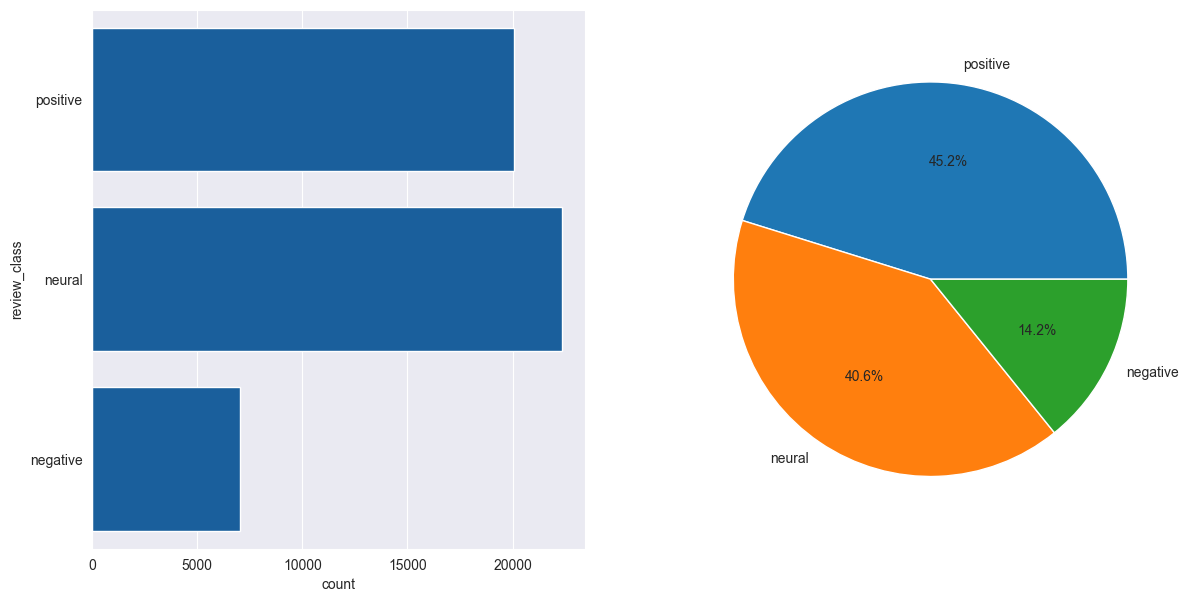

In [23]:
label = ['positive','neural','negative']
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sb.countplot(data.review_class,color='#0461b2')
plt.subplot(1,2,2)
plt.pie(data.review_class.value_counts(),labels=label,autopct='%1.1f%%');

In [24]:
#Hàm xử lý count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
def count_vectorizer(data,max_features,n_gram,vocabulary):
    cv = CountVectorizer(max_features=max_features,ngram_range=n_gram,stop_words=stop_words_list,vocabulary=vocabulary)
    cv_transformed = cv.fit(data['processed_comments']).transform(data['processed_comments'])
    cv_array = cv_transformed.toarray()
    cv_df = pd.DataFrame(cv_array,columns=cv.get_feature_names())
    data_temp = data.reset_index(drop=True)
    cv_df.reset_index(drop=True,inplace=True)
    #data_cv = pd.concat([data_temp,cv_df],axis=1,sort=False)
    return cv_df

In [25]:
#Hàm xử lý bằng tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
def tf_idf(data,max_features,n_gram,vocabulary):
    tf = TfidfVectorizer(max_features=max_features,ngram_range=n_gram,vocabulary=vocabulary)
    tf.fit_transform(data['processed_comments'])
    tf_transfrom = tf.transform(data['processed_comments'])
    tf_array = tf_transfrom.toarray()
    tfdf = pd.DataFrame(tf_array,columns=tf.get_feature_names_out())
    df_temp = data.reset_index(drop=True)
    tfdf.reset_index(drop=True,inplace=True)
    return tfdf

In [26]:
#Sử dụng SVD để giảm chiều dữ liệu:

def svd_function(X):
  from sklearn.decomposition import TruncatedSVD
  svd = TruncatedSVD(n_components=300, random_state=42)
  X_svd = svd.fit(X).transform(X)
  return X_svd

In [27]:
#Hàm cân bằng dữ liệu bằng under sampling:
from imblearn.under_sampling import RandomUnderSampler
def under_sampling(X,y):
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
    rs = RandomUnderSampler()
    X_train, y_train = rs.fit_resample(X_train,y_train)
    return X_train,X_test, y_train,y_test

In [28]:
#Hàm cân bằng dữ liệu bằng over sampling:
from imblearn.over_sampling import RandomOverSampler, SMOTE
def over_sampling(X,y):
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
    X_train, y_train = RandomOverSampler().fit_resample(X_train,y_train)
    return X_train,X_test, y_train,y_test

In [29]:
# Viết function SelectKbest để chọn các biến có tương quan tốt nhất.
def select_k_best_features(X,y, threshold=1.0):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    #X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

    best_k_features = SelectKBest(score_func=f_classif, k='all')
    #best_k_features.fit(X_train, y_train)
    best_k_features.fit(X, y)
    score = pd.Series(best_k_features.scores_)
    col = pd.Series(X.columns)
    result = pd.DataFrame({'Features': col, 'Score': score}).sort_values(by='Score', ascending=False)

    #print(result)
    plt.figure(figsize=(20,10))
    result_ = result.iloc[:100]
    plt.bar( result_.Features,result_.Score)
    plt.xticks(rotation=90)

    result_worst = result[result['Score'] < threshold]
    features_worst = result_worst['Features'].to_list()
    X_k_best = X.drop(features_worst,axis=1)
    features_best = list(X_k_best.columns)
    #return X_train[features], X_test[features], y_train, y_test
    return X_k_best,features_best, features_worst,result

In [30]:
#Tạo dataframe với tf_idf
X_gram = tf_idf(data,3000,(1,2),None)
#Output:
y = data['review_class_num']

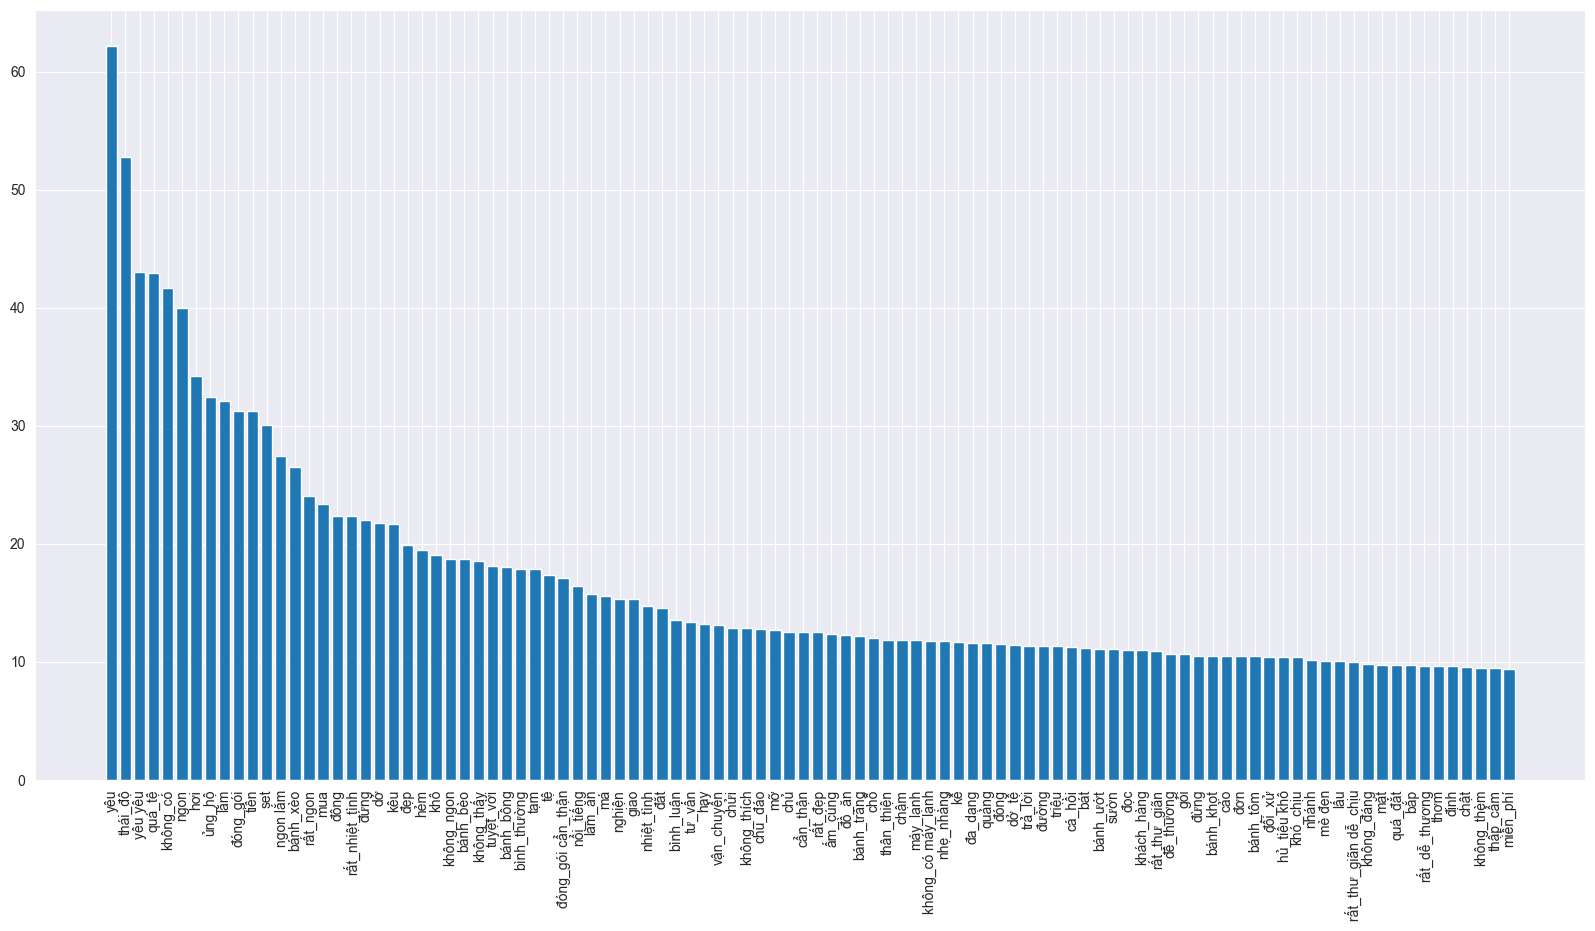

In [31]:
#Ta chọn các feature phù hợn nhất qua selectkbest
X_tf,vocabulary, stop_words,result = select_k_best_features(X_gram,y,7)

In [32]:
from sklearn.model_selection import KFold, train_test_split, cross_validate

#Dataset tạo bởi tf-idf không re-sampling:
dataset_1 = train_test_split(X_tf,y)
#Dataset tạo bởi tf-idf dùng under-sampling:
dataset_2 = under_sampling(np.array(X_tf),y)
#Dataset tạo bởi tf-idf dùng over-sampling:
dataset_3 = over_sampling(np.array(X_tf),y)

In [33]:
# Tạo list data-set:
list_data_set = [
             ('data tf-idf original', dataset_1),
             ('data tf-idf under-sampling', dataset_2),
             ('data tf-idf over-sampling', dataset_3)
]

In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score
import math
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# Chon k tu KNN
def choose_k(X_train, X_test, Y_train, Y_test):
    list_k = []
    list_acc = []
    for K_value in range(2, 11):
    
        list_k.append(K_value)
        neigh = KNeighborsClassifier(n_neighbors = K_value)
        neigh.fit(X_train, Y_train)
        Y_pred = neigh.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)*100
        train_knn = neigh.score(X_train, Y_train)
        test_knn = neigh.score(X_test, Y_test)
        
        list_acc.append(acc)
        print('Accuracy is', accuracy_score(Y_test, Y_pred)*100, "% for K-Value", K_value)
        print('Difference train vs test: ', abs(train_knn-test_knn),'\n')
    
    vi_tri = list_acc.index(max(list_acc))
    k = list_k[vi_tri]
    return k

In [ ]:
def model_comparison(x_train, x_test, y_train, y_test):
    models = [LogisticRegression(),
             MultinomialNB(),
             SVC(kernel = 'linear'),
             LinearSVC(),
             KNeighborsClassifier(n_neighbors = choose_k(x_train, x_test, y_train, y_test)), 
             RandomForestClassifier(n_estimators=40),
             DecisionTreeClassifier(),
             SGDClassifier(),
             AdaBoostClassifier(),
             XGBClassifier()
             ]

    CV = 10
    entries = []
    i=0
    for model in models:
        scores_train = []
        scores_test = []
        acc_scores = []
        times = []
        abs_scores = []
        for j in range(CV):
            t1 = datetime.datetime.now()
            model_name = model.__class__.__name__
            model.fit(X_train,Y_train)
            t2 = datetime.datetime.now()    
            d = round((t2 - t1).microseconds/1000,1) # => miliseconds
            score_train = model.score(x_train,y_train)
            score_test = model.score(x_test,y_test)
            Y_pred = model.predict(x_test)
            abs_score = abs(score_train - score_test)
            acc_score = accuracy_score(Y_pred, y_test)

            scores_train.append(score_train)          
            scores_test.append(score_test)
            acc_scores.append(acc_score)
            abs_scores.append(abs_score)
            times.append(d) 

        entries.append([model_name, np.array(scores_train).mean(), 
                        np.array(scores_test).mean(), np.array(acc_scores).mean(), np.array(abs_scores).mean(), 
                        np.array(times).mean()])
        i += 1
    cv_df = pd.DataFrame(entries, 
                         columns=['model_name', 'score_train_mean', 
                                  'score_test_mean', 'acc_score_mean','abs|score|', 'time_mean'])
    return cv_df

In [ ]:
X_train, X_test, Y_train, Y_test = dataset_1
model_comparison(X_train, X_test, Y_train, Y_test)

### Dataset 2

In [ ]:
X_under_train, X_under_test, Y_under_train, Y_under_test = dataset_2
model_comparison(X_under_train, X_under_test, Y_under_train, Y_under_test)

### Dataset 3

In [ ]:
X_over_train, X_over_test, Y_over_train, Y_over_test = dataset_3
model_comparison(X_over_train, X_over_test, Y_over_train, Y_over_test)

In [35]:
from numpy import concatenate
from sklearn.semi_supervised import LabelPropagation
from numpy import concatenate
from sklearn.feature_extraction.text import TfidfTransformer

import os
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

In [36]:
########################################################

In [37]:
data_labeled = pd.read_csv('labeled_data.csv')
data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  890 non-null    object
 1   ratings   890 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [38]:
data_labeled = data_labeled.drop_duplicates(subset='comments').reset_index()
data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     881 non-null    int64 
 1   comments  881 non-null    object
 2   ratings   881 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.8+ KB


In [39]:
data_labeled['processed_comments'] = ""
i = 0
for comment in data_labeled['comments']:
    document = process_text(comment, emoji_dict, teen_dict, wrong_lst)
    document = convert_unicode(document)
    document = process_postag_thesea(document)
    document = remove_stopword(document,stopwords_lst)
    data_labeled['processed_comments'][i] = document
    i = i + 1

In [40]:
data_labeled['review_class'] = ['positive' if a >= 8 else 'negative' if a < 5 else 'neural' for a in data_labeled.ratings]
#label encoder:
data_labeled['review_class_num'] = [0 if x == 'positive'  else 1 if x == 'neural' else 2 for x in data_labeled.review_class]

In [41]:
df_labeled = data_labeled[['processed_comments', 'review_class_num']]
df_labeled.shape

(881, 2)

In [42]:
df_org = data.loc[~((data['comments'] == 'mì trộn thập cẩm') | (data['comments'].str.contains('pass voucher')) | 
                      (data['comments'].str.contains('cần bán voucher')))]
df_org.shape

(49411, 5)

In [43]:
df_org = df_org[['processed_comments']]


In [44]:
df_not_labeled = df_org[~df_org.processed_comments.isin(df_labeled.processed_comments.to_list())]
df_not_labeled.shape

(48096, 1)

In [45]:
df_not_labeled.head()

,processed_comments
0,tuyệt_vời
1,tuyệt_vời yêu
2,tuyệt_vời yêu
3,tuyệt_vời
4,tuyệt_vời yêu


In [46]:
df_final = pd.concat([df_labeled,df_not_labeled])
df_final.head()

,processed_comments,review_class_num
0,nằm_tâm đi_lại chuyên_đồ ẩm_thực_singapor hay ...,0.0
1,dòng_sẻ trước_tiên_lý ăn_nhánh rất_ngon ấn_tượ...,2.0
2,chục đồ_ăn_uống tiện lắm chiên cục hay bưng hà...,0.0
3,khô sợi to gà_mềm thơm,0.0
4,bánh_xèo to khô dầu_mỡ mùi_vị rất_bình_thường ...,2.0


In [47]:
df_final.tail()

,processed_comments,review_class_num
49454,tưởng ngờ sống khổng_lồ ăn_no bể bụng,NaN
49455,đông nướng chục rất_thật hay ổ giá hợp_lý ổ kh...,NaN
49456,thử đông giá ổn lề_đường hơi bụi lát lốt mỡ ch...,NaN
49457,giá_cả không_rẻ lề_đường đông đặc_biết tuần đồ...,NaN
49458,không_hối_hận lắm đồn hay không_mà ăn_hơi sống...,NaN


In [48]:
df_final.fillna(-1, inplace=True)
df_final.tail()

,processed_comments,review_class_num
49454,tưởng ngờ sống khổng_lồ ăn_no bể bụng,-1.0
49455,đông nướng chục rất_thật hay ổ giá hợp_lý ổ kh...,-1.0
49456,thử đông giá ổn lề_đường hơi bụi lát lốt mỡ ch...,-1.0
49457,giá_cả không_rẻ lề_đường đông đặc_biết tuần đồ...,-1.0
49458,không_hối_hận lắm đồn hay không_mà ăn_hơi sống...,-1.0


In [49]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
import os

In [50]:
from imblearn.pipeline import Pipeline
# Parameters
vectorizer_params = dict(ngram_range=(1, 2), min_df=5, max_df=0.85)
logistic_params = dict(multi_class='multinomial', C=1, solver='saga', penalty='l1')
SMOTE(random_state=42)
# Supervised Pipeline
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", LogisticRegression(**logistic_params)),

    ]
)
# SelfTraining Pipeline
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        ("clf", SelfTrainingClassifier(LogisticRegression(**logistic_params), verbose=True)),
    ]
)
# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ('oversampler', SMOTE()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading())
    ]
)

In [51]:
def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "Micro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="micro")
    )
    print("-" * 10)
    print()

In [52]:
df_train = df_final[df_final.review_class_num >= 0]
df_test = df_final[df_final.review_class_num < 0]

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train['processed_comments'], df_train['review_class_num'])

In [54]:
X_train.head()

360    lâu ghé thoáng_mát sạch_sẽ nhanh hủ_tiếu nhanh...
628                                   quá_ngon_đáng tiền
258    thương_hiệu chú_tắc kỳ_đồng nổi_tiếng khắp bé ...
103    tương_đen lẩu mỳ tương_đen vị rất_nhạt không_n...
698    sinh_nhật vigor vô_tình chồng zem nhận_xét ngh...
Name: processed_comments, dtype: object

In [55]:
print("Supervised LogisticClassifier on 20% of the training data:")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

# set the non-masked subset to be unlabeled
print("SelfTrainingClassifier on 20% of the training data (rest is unlabeled):")
eval_and_print_metrics(st_pipeline, X_train, Y_train, X_test, Y_test)

# if "CI" not in os.environ:
#     # LabelSpreading takes too long to run in the online documentation
#     print("LabelSpreading on 20% of the data (rest is unlabeled):")
#     eval_and_print_metrics(ls_pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticClassifier on 20% of the training data:
Number of training samples: 660
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.778
----------

SelfTrainingClassifier on 20% of the training data (rest is unlabeled):
Number of training samples: 660
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.792
----------



In [56]:
model = st_pipeline.fit(X_train, Y_train)
Y_pred = model.predict(df_test['processed_comments'])

In [57]:
df_test['review_class_num'] = Y_pred

In [58]:
df_new = pd.concat([df_train, df_test[['processed_comments', 'review_class_num']]], ignore_index=True)

In [59]:
df_new.to_csv('Labeled_Foody_Review_from_model.csv', index=False)

In [60]:
df_new.head()

,processed_comments,review_class_num
0,nằm_tâm đi_lại chuyên_đồ ẩm_thực_singapor hay ...,0.0
1,dòng_sẻ trước_tiên_lý ăn_nhánh rất_ngon ấn_tượ...,2.0
2,chục đồ_ăn_uống tiện lắm chiên cục hay bưng hà...,0.0
3,khô sợi to gà_mềm thơm,0.0
4,bánh_xèo to khô dầu_mỡ mùi_vị rất_bình_thường ...,2.0


In [61]:
# Tạo lại train test split từ datafame mới là df_new
X_train, X_test, Y_train, Y_test = train_test_split(df_new['processed_comments'], df_new['review_class_num'], test_size=0.2)

In [62]:
print("Supervised LogisticRegressor")
eval_and_print_metrics(pipeline, X_train, Y_train, X_test, Y_test)

Supervised LogisticRegressor
Number of training samples: 39181
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.961
----------



In [63]:
model_new = pipeline.fit(X_train, Y_train)
Y_pred = model_new.predict(X_test)

In [64]:
model_new.score(X_train,Y_train)

0.9695770909369337

In [65]:
model_new.score(X_test,Y_test)

0.9620253164556962

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      5823
         1.0       0.84      0.95      0.90       995
         2.0       0.96      0.96      0.96      2978

    accuracy                           0.96      9796
   macro avg       0.93      0.96      0.94      9796
weighted avg       0.96      0.96      0.96      9796



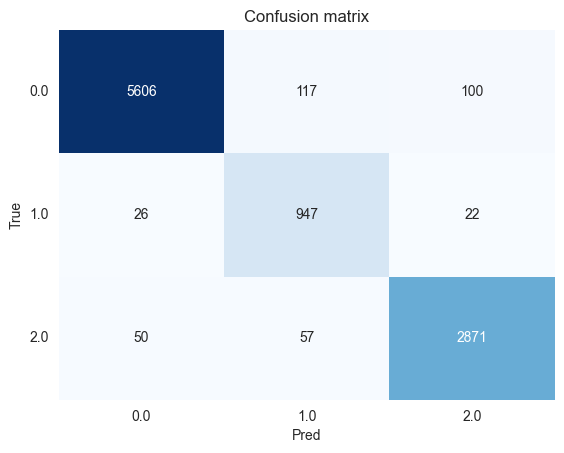

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
# print('Confusion matrix: \n', confusion_matrix(Y_test, Y_pred))
print('Classification report: \n', classification_report(Y_test, Y_pred))
classes = np.unique(Y_test)
Y_test_array = pd.get_dummies(Y_test, drop_first=False).values
## Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots()
sb.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

In [67]:
text ="Không gian quán rất thoải mái và thức ăn thật sự ngon miệng. Mình đã có một trải nghiệm tuyệt vời ở đây."
document = replace_word(text)
document = process_text(document, emoji_dict, teen_dict, wrong_lst)
document = convert_unicode(document)
document = process_postag_thesea(document)
# document
document = remove_stopword(document,stopwords_lst)
yhat = model_new.predict([document])[0]
if yhat== 0:
    label = "bình luận tích cực"
elif yhat== 1:
    label = "bình luận trung tính"
else:
    label = "bình luận tiêu cực"
print(label)
#     print(proba, '\n')
print(document)

bình luận tích cực
rất_thoải_mái thức_ăn ngon_miệng trải_nghiệm tuyệt_vời


In [ ]:
pos_tag('sang trọng')

In [ ]:
####################################